# PolyMNIST EDA

In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

2024-08-22 14:56:26.580564: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 14:56:27.231510: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 14:56:27.335723: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-22 14:56:27.652183: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-22 14:56:30.314815: W tensorflow/compiler/tf2

Cargamos los datos

In [ ]:
# Directories for training and testing
train_dir = 'data/train'
test_dir = 'data/test'

In [ ]:
img_height = 28
img_width = 28

In [4]:
# Function to load images and extract labels
def load_images_from_directory(directory):
    images = []
    labels = []
    
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            label = int(filename.split('.')[1])  # Extract label from filename
            img_path = os.path.join(directory, filename)
            img = load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
            img_array = img_to_array(img) / 255.0  # Normalize the image
            images.append(img_array)
            labels.append(label)
    
    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels)

I0000 00:00:1724339673.087559      26 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724339673.381635      26 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724339673.381711      26 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724339673.388302      26 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724339673.388459      26 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [ ]:
# Load training and testing data
train_images, train_labels = load_images_from_directory(train_dir)
test_images, test_labels = load_images_from_directory(test_dir)

In [5]:
# Display the shape of the data
print(f'Training images shape: {train_images.shape}')
print(f'Training labels shape: {train_labels.shape}')
print(f'Testing images shape: {test_images.shape}')
print(f'Testing labels shape: {test_labels.shape}')

Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28, 1)
Testing labels shape: (10000,)


In [ ]:
def display_sample_images(images, labels):
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    fig.subplots_adjust(hspace=0.5, wspace=.001)
    axs = axs.ravel()
    for i in range(10):
        idx = tf.where(labels == i)[0][0].numpy()  # Find the index of the first occurrence of the label
        axs[i].imshow(images[idx].numpy().reshape(img_height, img_width), cmap='gray')
        axs[i].set_title(f'Label: {i}')
        axs[i].axis('off')
    plt.show()

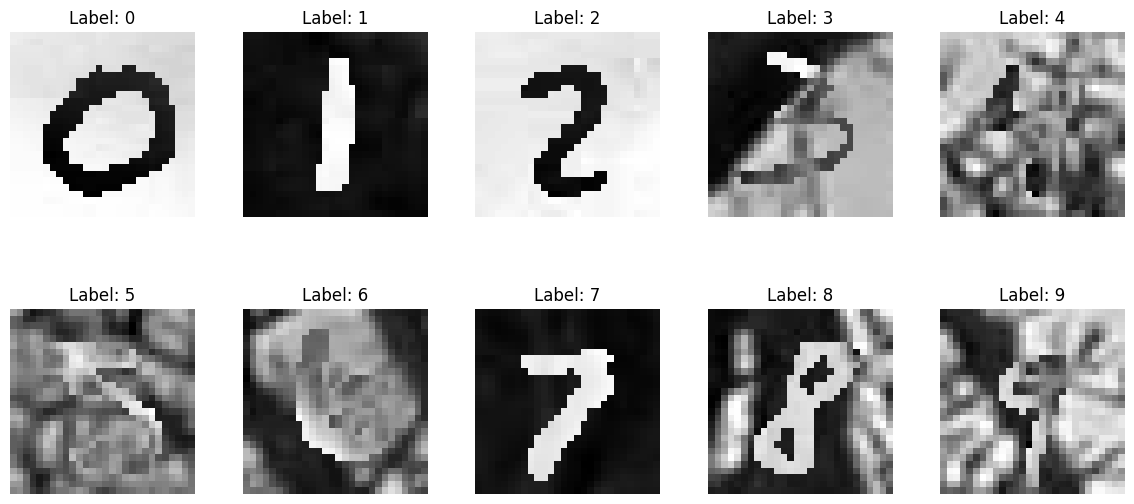

In [9]:
display_sample_images(train_images, train_labels)

Exploramos la distribución de las etiquetas

In [10]:
def display_label_distribution(labels):
    plt.hist(labels, bins=10, color='skyblue', edgecolor='black')
    plt.title('Label Distribution')
    plt.xlabel('Label')
    plt.ylabel('Frequency')
    plt.show()

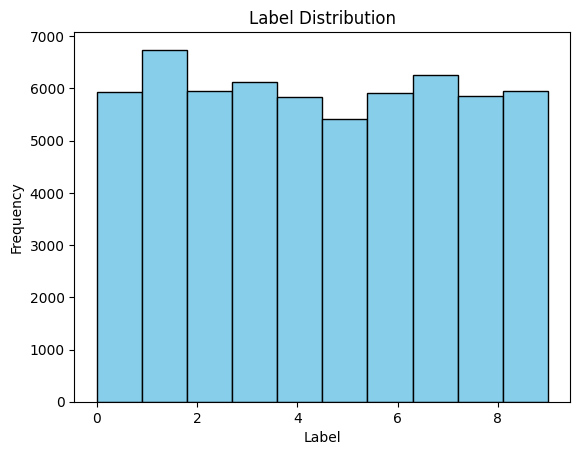

In [11]:
display_label_distribution(train_labels)

In [12]:
print(f'Label 1 count: {tf.reduce_sum(tf.cast(train_labels == 1, tf.int32))}')
print(f'Label 5 count: {tf.reduce_sum(tf.cast(train_labels == 5, tf.int32))}')

Label 1 count: 6742
Label 5 count: 5421


Podemo observar que el conjunto de datos se encuentra **relativamente balanceado**. Las categorías que destacan son la del número 1 con 6742 imágenes (la categoría mayor), mientras ue la del número 5 tiene 5421 (la de la categoría menor). Todas las imágenes se transofrmaron a valores de **blanco y negro** con el fin de reducir la dimensionalidad. Además, todas las imágenes tienen una dimensionalidad de **28x28 px**.